In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
np.random.seed(0)

In [4]:
def display_sample(sample):
    plt.figure(figsize=(2, 2))
    plt.imshow(sample, cmap='gray')
    plt.show()

In [5]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [6]:
# 80% for train and 20% for validation

# TODO: Split your (X_train, y_train) data into 2 parts: 80% is used for training (X_tr, y_tr) and 20% is used for validation (X_val, y_val).
# Splitting your training data into training and validation is one of the best practices to handle underfitting and overfitting issues.
# In general, you use the train data for training and the validation data for checking whether your model is overfitting or underfitting

from sklearn.model_selection import train_test_split


X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train X data shape: %s" % (X_tr.shape,))
print("Train y data shape: %s" % (y_tr.shape,))
print("Validation X data shape: %s" % (X_val.shape,))
print("Validation y data shape: %s" % (y_val.shape,))
print("Test X data shape: %s" % (X_test.shape,))
print("Test y data shape: %s" % (y_test.shape,))

Train X data shape: (48000, 28, 28)
Train y data shape: (48000,)
Validation X data shape: (12000, 28, 28)
Validation y data shape: (12000,)
Test X data shape: (10000, 28, 28)
Test y data shape: (10000,)


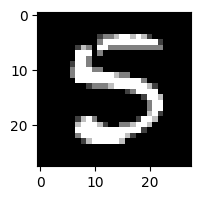

Label: 5


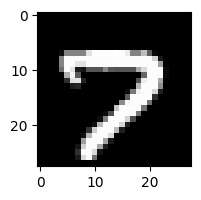

Label: 7


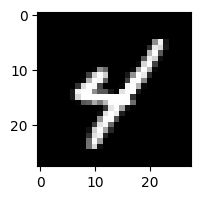

Label: 4


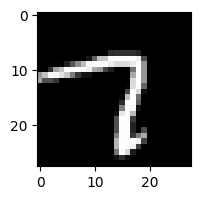

Label: 7


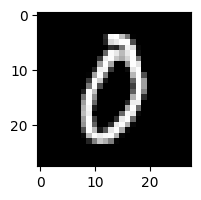

Label: 0


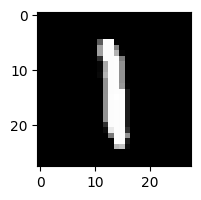

Label: 1


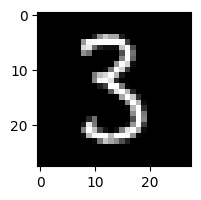

Label: 3


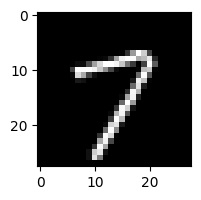

Label: 7


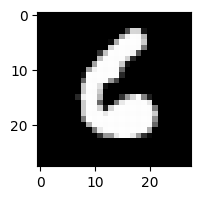

Label: 6


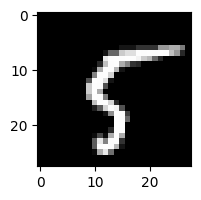

Label: 5


In [7]:
for i in range(10):
    random_idx = np.random.randint(0, len(X_test))
    display_sample(X_tr[random_idx])
    print("Label: %s" % y_tr[random_idx])

In [8]:
def normalize(X):
    return X / 255

In [9]:
X_tr_norm = normalize(X_tr)
X_val_norm = normalize(X_val)
X_test_norm = normalize(X_test)

In [10]:
X_tr_norm[0][0][0]

0.0

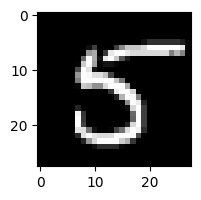

Label: 5


In [11]:
display_sample(X_tr_norm[0])
print("Label: %s" % y_tr[0])

In [18]:
# TODO: Build NN model with 1 hidden layer of 128 units.
# Use ReLU activation function.
# Use Softmax for the probability distribution outputs of 10 classes
# Do not forget to use Flatten layer to reshape your input data into vectors
# Cant run because of resourceexhaustedError


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_tr_norm.shape[0], X_tr_norm.shape[1], X_tr_norm.shape[2])),  # Replace 'your_input_shape' with the actual shape of your input data

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[37632000,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Mul]

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
history = model.fit(X_tr_norm, y_tr, validation_data=(X_val_norm, y_val), batch_size=100, epochs=20)

Epoch 1/20


2023-12-11 21:09:48.702401: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-11 21:09:48.899777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


472/480 [============================>.] - ETA: 0s - loss: 0.3742 - accuracy: 0.8988

2023-12-11 21:09:53.430280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 5s 7ms/step - loss: 0.3718 - accuracy: 0.8993 - val_loss: 0.2155 - val_accuracy: 0.9392
Epoch 2/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1764 - accuracy: 0.9487 - val_loss: 0.1535 - val_accuracy: 0.9556
Epoch 3/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1243 - accuracy: 0.9644 - val_loss: 0.1274 - val_accuracy: 0.9607
Epoch 4/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0954 - accuracy: 0.9718 - val_loss: 0.1117 - val_accuracy: 0.9657
Epoch 5/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0766 - accuracy: 0.9780 - val_loss: 0.1046 - val_accuracy: 0.9668
Epoch 6/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0628 - accuracy: 0.9823 - val_loss: 0.0974 - val_accuracy: 0.9686
Epoch 7/20
480/480 [==============================] - 3s 6ms/step - loss: 0.0522 - accuracy: 0.9858 - val_loss: 0.0877 - val_accuracy: 0.9723
Epoch 8/20
480/48

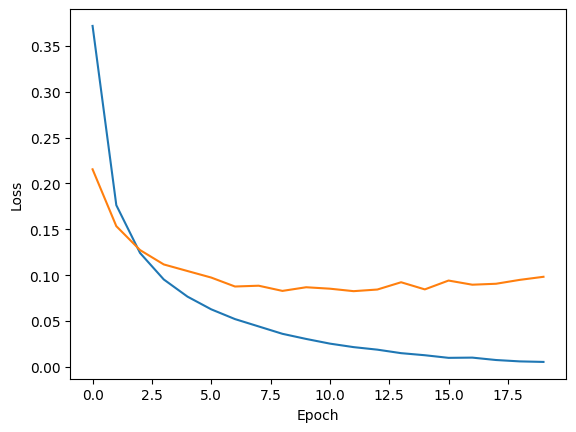

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

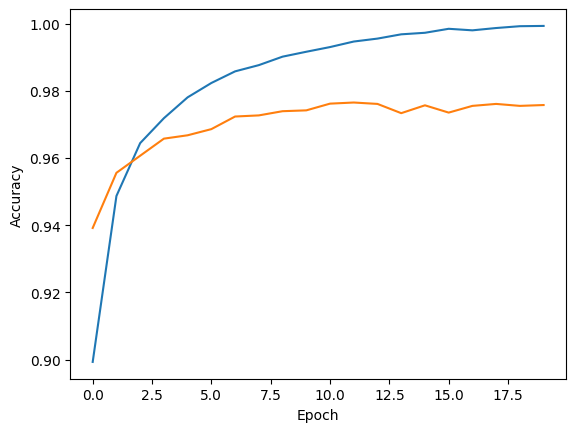

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [16]:
accuracy_metric = tf.keras.metrics.Accuracy()
predictions = model.predict(X_val_norm).argmax(axis=1)

print("Accuracy (validation): %s" % accuracy_metric(predictions, y_val).numpy())

 54/375 [===>..........................] - ETA: 0s

2023-12-11 21:11:05.629759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 2ms/step
Accuracy (validation): 0.97575


In [17]:
accuracy_metric = tf.keras.metrics.Accuracy()
predictions = model.predict(X_test_norm).argmax(axis=1)

print("Accuracy (Test): %s" % accuracy_metric(predictions, y_test).numpy())

 87/313 [=======>......................] - ETA: 0s

2023-12-11 21:11:13.853857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Accuracy (Test): 0.9748


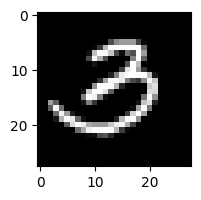

Label: 3
Predicted: 3


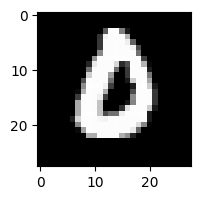

Label: 0
Predicted: 0


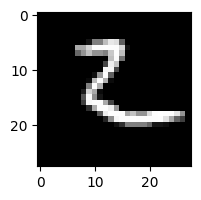

Label: 2
Predicted: 2


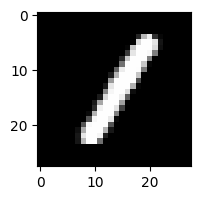

Label: 1
Predicted: 1


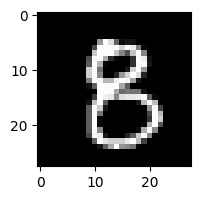

Label: 8
Predicted: 8


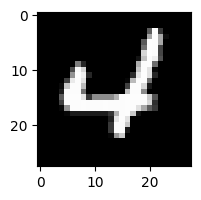

Label: 4
Predicted: 4


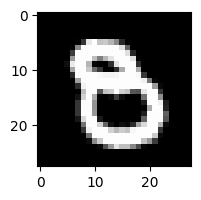

Label: 8
Predicted: 8


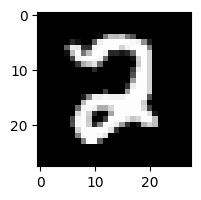

Label: 2
Predicted: 2


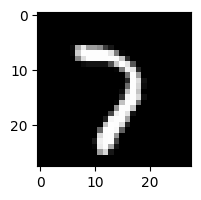

Label: 7
Predicted: 7


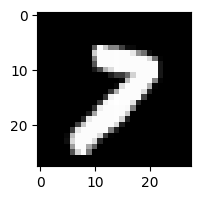

Label: 7
Predicted: 7


In [18]:
for i in range(10):
    random_idx = np.random.randint(0, len(X_test))
    display_sample(X_test[random_idx])
    print("Label: %s" % y_test[random_idx])
    print("Predicted: %s" % predictions[random_idx])

In [19]:
# TODO: Build your own NN model to increase the accuracy
# Use Regularization, Optimization techniques
# Cant run Because of resourceExhaustionError
custom_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_tr_norm.shape[0] ,X_tr_norm.shape[1] * X_tr_norm.shape[2])),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
# You can adjust hyperparameters to the ones you need

custom_model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])

In [21]:
custom_history = custom_model.fit(X_tr_norm, y_tr, validation_data=(X_val_norm, y_val), batch_size=128, epochs=100)

Epoch 1/100


2023-12-11 21:11:34.603251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


372/375 [============================>.] - ETA: 0s - loss: 0.4902 - accuracy: 0.8500

2023-12-11 21:11:38.255050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 4s 9ms/step - loss: 0.4879 - accuracy: 0.8506 - val_loss: 0.1892 - val_accuracy: 0.9443
Epoch 2/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2027 - accuracy: 0.9395 - val_loss: 0.1404 - val_accuracy: 0.9596
Epoch 3/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1565 - accuracy: 0.9538 - val_loss: 0.1186 - val_accuracy: 0.9657
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1314 - accuracy: 0.9598 - val_loss: 0.1151 - val_accuracy: 0.9675
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1128 - accuracy: 0.9655 - val_loss: 0.1019 - val_accuracy: 0.9697
Epoch 6/100
375/375 [==============================] - 3s 9ms/step - loss: 0.1058 - accuracy: 0.9677 - val_loss: 0.0959 - val_accuracy: 0.9732
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.0906 - accuracy: 0.9725 - val_loss: 0.0961 - val_accuracy: 0.9740
Epoch 8/100

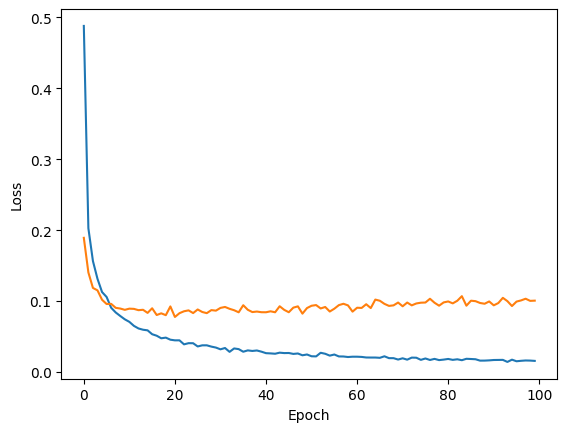

In [22]:
plt.plot(custom_history.history['loss'], label='loss')
plt.plot(custom_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

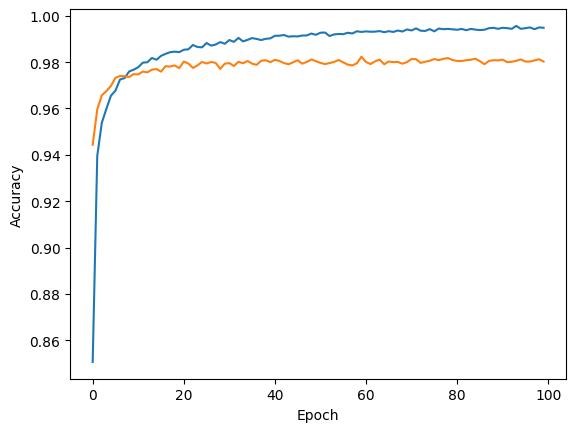

In [23]:
plt.plot(custom_history.history['accuracy'], label='accuracy')
plt.plot(custom_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [24]:
accuracy_metric = tf.keras.metrics.Accuracy()
predictions = model.predict(X_val_norm).argmax(axis=1)
custom_predictions = custom_model.predict(X_val_norm).argmax(axis=1)

print("Accuracy (Validation): %s" % accuracy_metric(predictions, y_val).numpy())
print("Accuracy Custom (Validation): %s" % accuracy_metric(custom_predictions, y_val).numpy())

 72/375 [====>.........................] - ETA: 0s

2023-12-11 21:18:33.711066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 1s 2ms/step
Accuracy (Validation): 0.97575
Accuracy Custom (Validation): 0.978


In [25]:
accuracy_metric = tf.keras.metrics.Accuracy()
predictions = model.predict(X_test_norm).argmax(axis=1)
custom_predictions = custom_model.predict(X_test_norm).argmax(axis=1)

print("Accuracy (Validation): %s" % accuracy_metric(predictions, y_test).numpy())
print("Accuracy Custom (Validation): %s" % accuracy_metric(custom_predictions, y_test).numpy())

 68/313 [=====>........................] - ETA: 0s

2023-12-11 21:18:53.108553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Accuracy (Validation): 0.9748
Accuracy Custom (Validation): 0.978
